Aluno: Leonardo Pessôa Bandeira Lacerda - 119110415

In [378]:
import matplotlib.pyplot as plt
import matplotlib.style
import numpy as np
import math
import pandas as pd
import importlib.util
from scipy import fftpack as fft
from scipy.signal import find_peaks
import numpy.lib.scimath as sp

def DFT(signal, N, inverse): # Definition of DFT function
    size = len(signal)
    
    if(size > N): # This if tries to compensate size diference between N and the signal
        signal = signal[0:N] 
    elif(size < N):
        signal = np.transpose(np.append(signal, np.zeros(N-size)))
     
    w = np.zeros((N,N), dtype = 'complex_')
    if inverse:
        for c in range(N):
            for l in range(N):
                w[l][c] = (1/N)*np.exp(2*np.pi*1j/N)**(c*l)
        result = (w@signal)
        return result

    for c in range(N):
        for l in range(N):
            w[l][c] = np.exp(-2*np.pi*1j/N)**(c*l)
    result = (w@signal)
    return result

In [379]:
frequency = 4*3200
T = 1/(np.gcd.reduce([3200,600,300]))
time = 10*T
samples = int((frequency*time))

n = np.linspace(0, time, samples)
t = np.linspace(0, time, 8192)

signal = np.cos(2*np.pi*3200*t) +  0.5*np.cos(2*np.pi*600*t) + 0.01*np.cos(2*np.pi*300*t)
sampled_signal = np.cos(2*np.pi*3200*n) +  0.5*np.cos(2*np.pi*600*n) + 0.01*np.cos(2*np.pi*300*n)

print("The number of samples are:", samples)

The number of samples are: 1280


In [380]:
dft = DFT(sampled_signal,samples,False)
idft = DFT(dft,samples, True)

Text(0, 0.5, 'Amplitude')

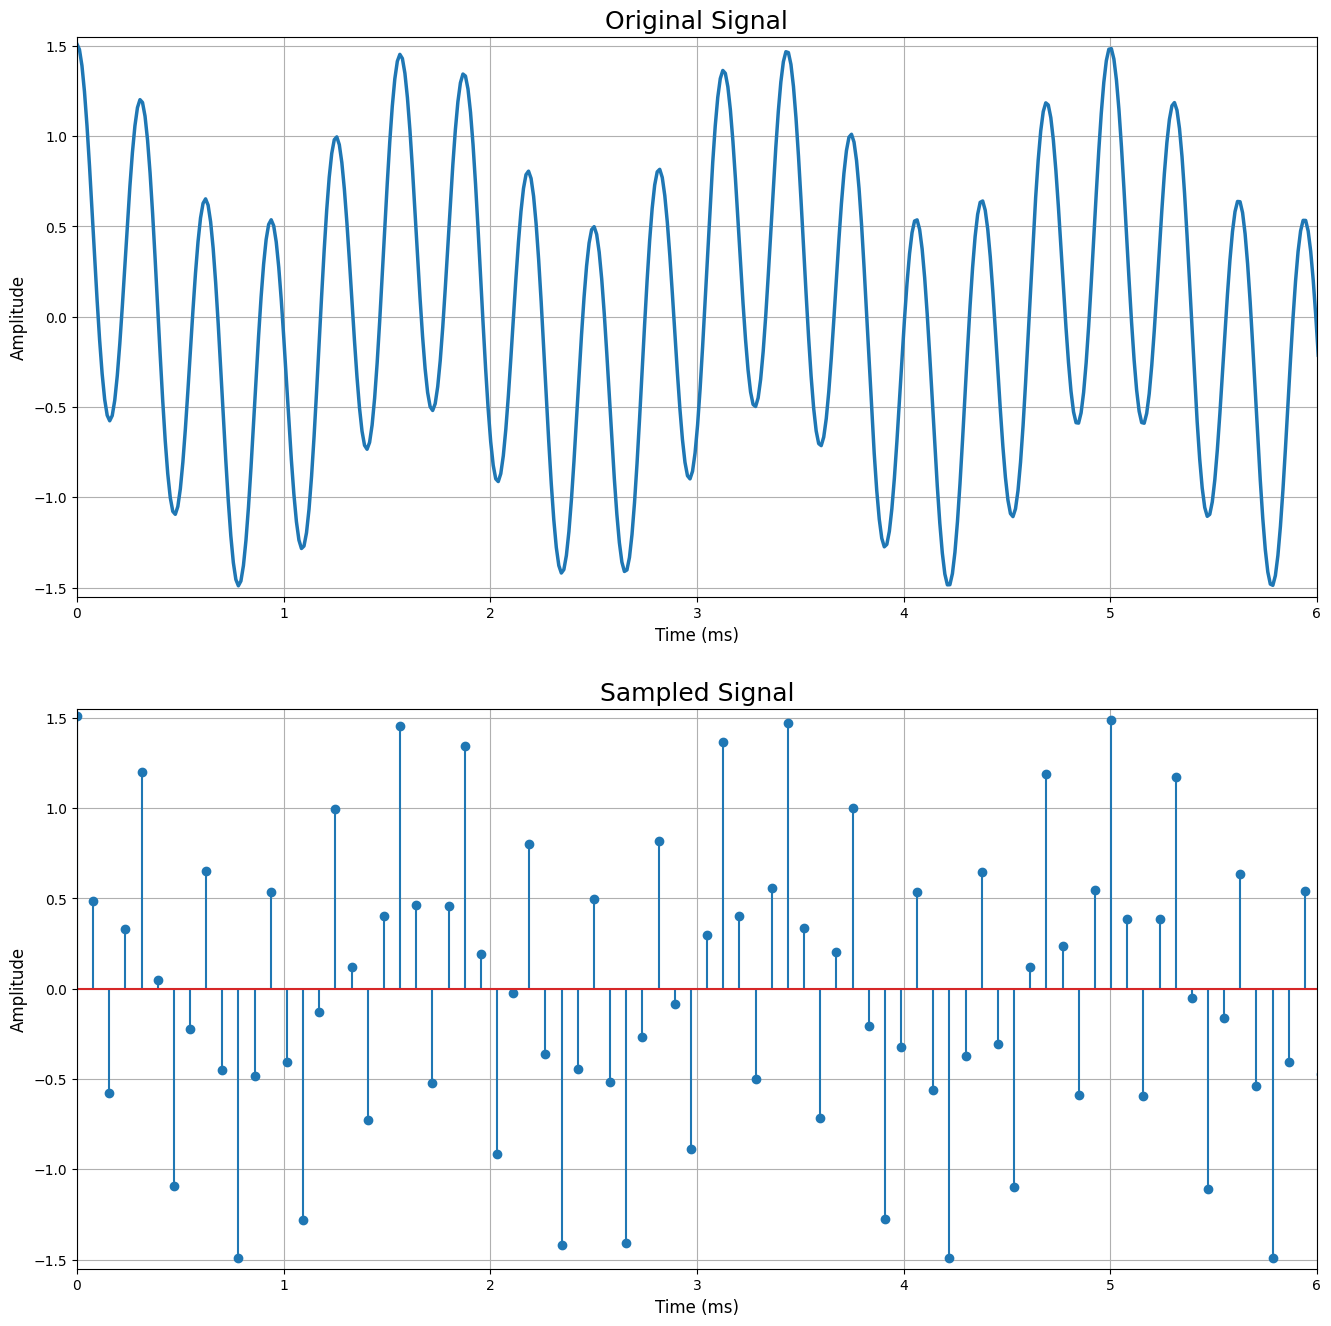

In [381]:
figure, fig = plt.subplots(2, 1, figsize=(16,16))

fig[0].plot(t*1e3, signal, linewidth = 2.5)
fig[0].set_xlim(0,6)
fig[0].grid()
fig[0].set_ylim(-1.55,1.55)
fig[0].set_title("Original Signal", fontsize= 18)
fig[0].set_xlabel("Time (ms)", fontsize = 12)
fig[0].set_ylabel("Amplitude", fontsize = 12)

fig[1].stem(n*1e3, sampled_signal)
fig[1].set_xlim(0,6)
fig[1].grid()
fig[1].set_ylim(-1.55,1.55)
fig[1].set_title("Sampled Signal", fontsize= 18)
fig[1].set_xlabel("Time (ms)", fontsize = 12)
fig[1].set_ylabel("Amplitude", fontsize = 12)

Text(0, 0.5, 'Amplitude')

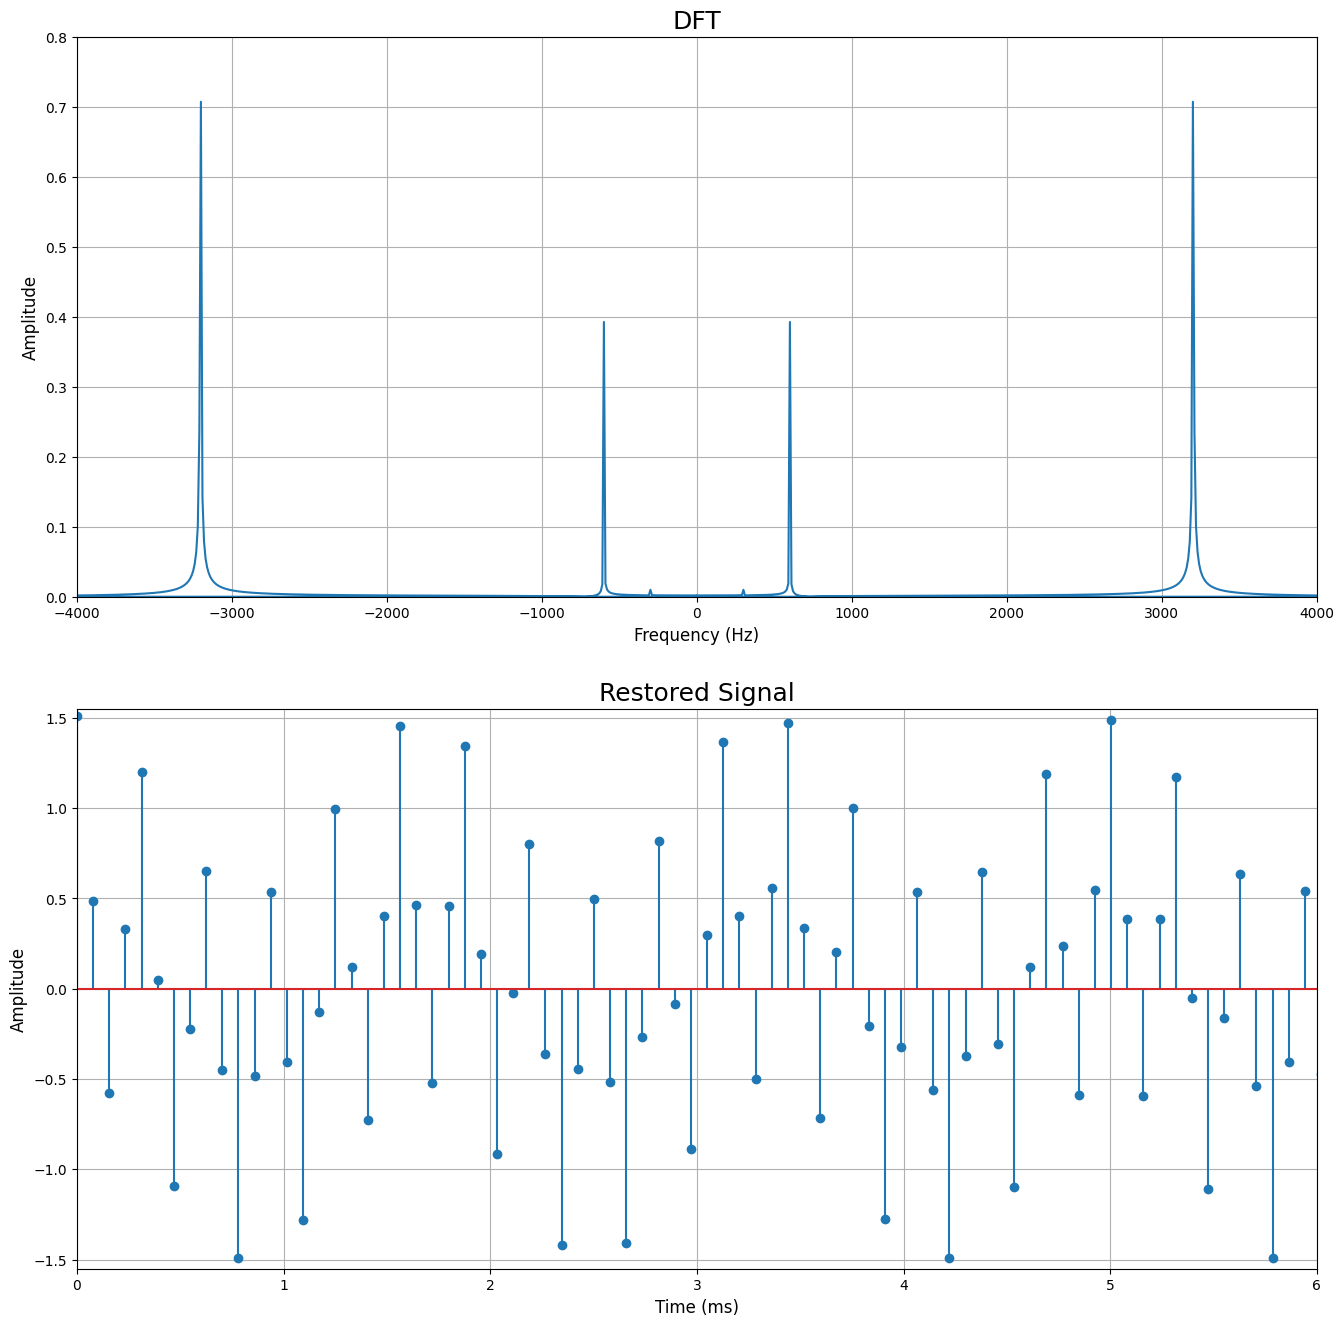

In [383]:
figure, fig = plt.subplots(2, 1, figsize=(16,16))
freq = np.fft.fftfreq(samples)

fig[0].plot(freq*frequency, abs(dft)/dft.max())
fig[0].set_xlim(-4000, 4000)
fig[0].grid()
fig[0].set_ylim(0,0.8)
fig[0].set_title("DFT", fontsize= 18)
fig[0].set_xlabel("Frequency (Hz)", fontsize = 12)
fig[0].set_ylabel("Amplitude", fontsize = 12)

fig[1].stem(n*1e3, idft)
fig[1].set_xlim(0,6)
fig[1].grid()
fig[1].set_ylim(-1.55,1.55)
fig[1].set_title("Restored Signal", fontsize= 18)
fig[1].set_xlabel("Time (ms)", fontsize = 12)
fig[1].set_ylabel("Amplitude", fontsize = 12)

